In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os

In [3]:
# Load training data
train_df = pd.read_csv('train.csv')
train_df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


# Missing Value

In [4]:
train_df['category'].isnull().sum()

0

In [5]:
train_df['crimeaditionalinfo'].isnull().sum()

21

* Given that there is missing value in the feature column, there is merit in removing 21 rows with missing values

Category Column Distribution

In [6]:
train_df['category'].value_counts()

,count
category,
Online Financial Fraud,57434
Online and Social Media Related Crime,12140
Any Other Cyber Crime,10878
Cyber Attack/ Dependent Crimes,3608
RapeGang Rape RGRSexually Abusive Content,2822
Sexually Obscene material,1838
Hacking Damage to computercomputer system etc,1710
Sexually Explicit Act,1552
Cryptocurrency Crime,480


* Given that there is only 1 value for **Report Unlawful Content** class, I'll remove it going forward.

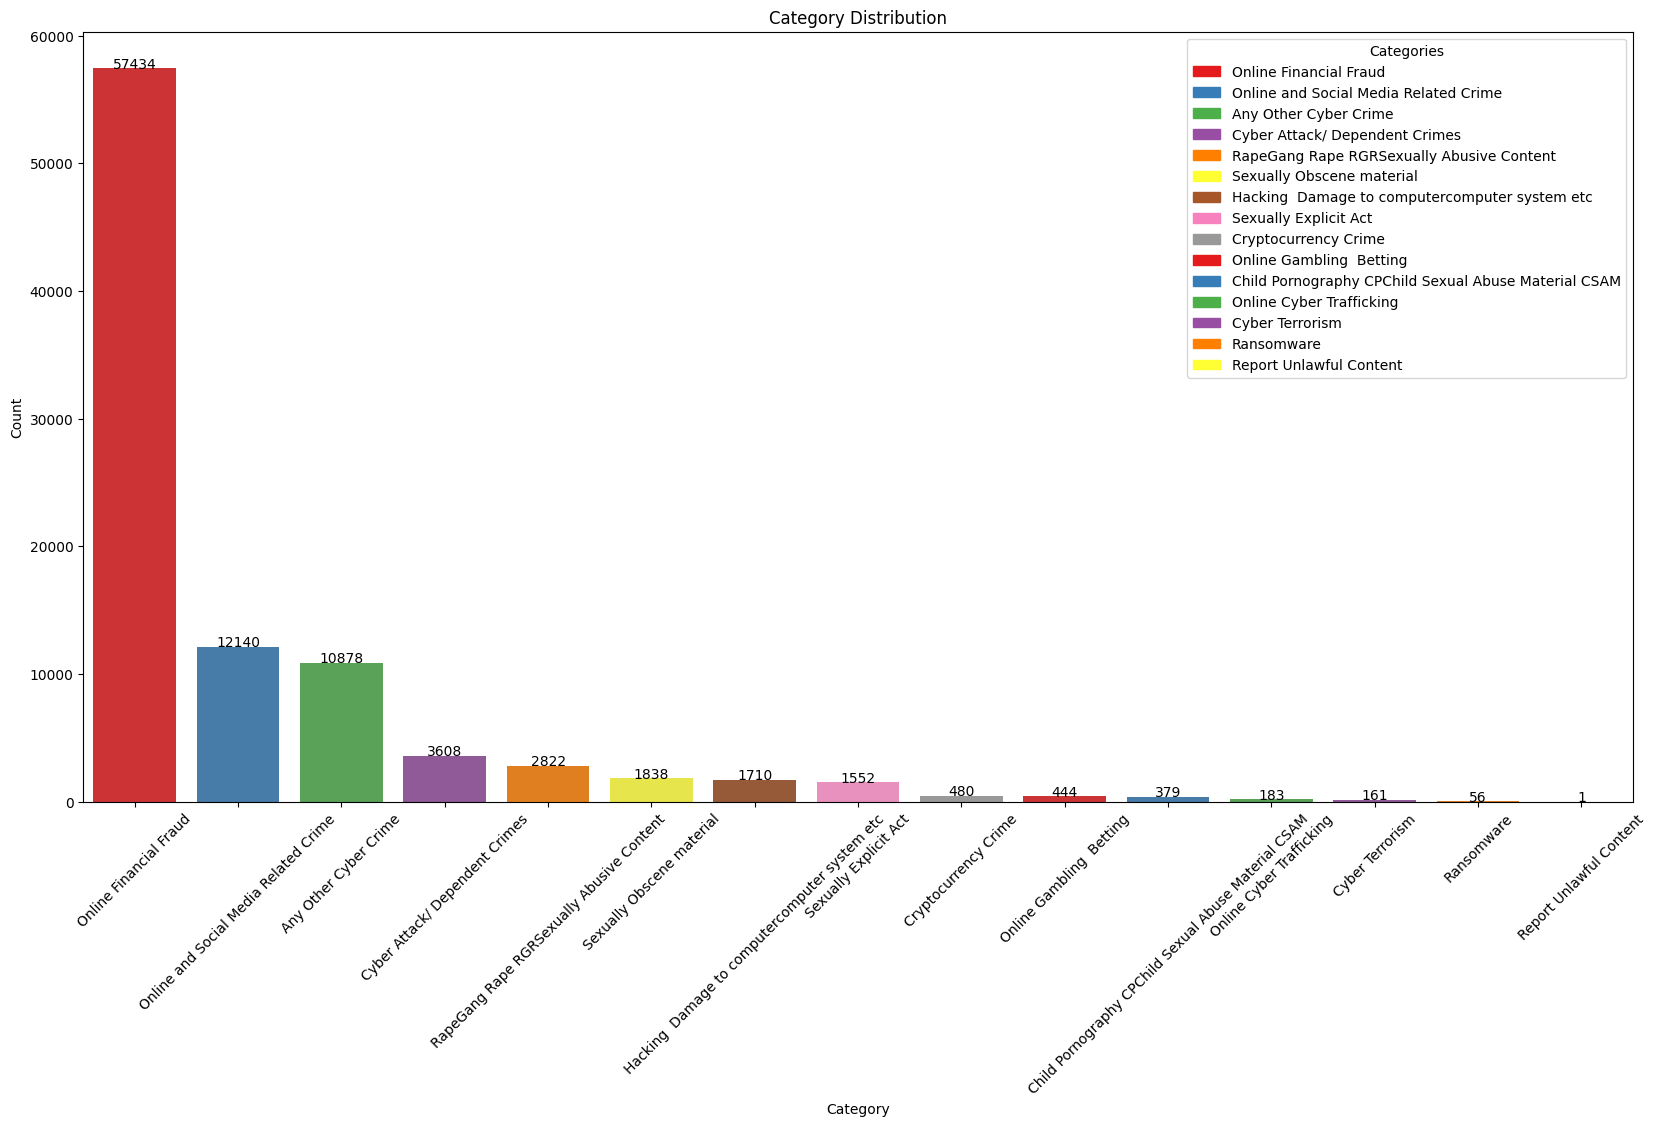

In [11]:
# Prepare the data
category_counts = train_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Create a color palette with distinct colors for each category
palette = sns.color_palette('Set1', n_colors=len(category_counts))

# Create the bar plot with hue and disable the built-in legend
plt.figure(figsize=(20, 10))
sns.barplot(x='category', y='count',
            data=category_counts,
            hue='category',
            palette=palette,
            dodge=False,
            legend=False)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

plt.xticks(rotation=45)

# Display the count on top of the bars
for index, row in category_counts.iterrows():
    plt.text(row.name, row['count'] + 1, row['count'], color='black', ha="center")

# Add a legend manually for each category
legend_patches = [mpatches.Patch(color=palette[i], label=category_counts['category'][i]) for i in range(len(category_counts))]
plt.legend(handles=legend_patches, title='Categories')

# Show the plot
plt.show()